In [1]:
# This notebook is for resting-state functional networks calculation based on gradient-weighted cortical maps.

# Includes:
#    loding cortical surface data
#    saving cortical surface data to dataframe and csv
#    loading network txt
#    

In [1]:
import os
from numpy import load
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
import nibabel as nib
from nilearn import datasets, plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from brainspace.datasets import load_fsa5, load_conte69
from brainspace.plotting import plot_hemispheres
from brainspace.datasets import load_parcellation
from brainspace.utils.parcellation import map_to_labels
from neuromaps import images

### Setting the path

In [5]:
# get the current notebook path
note_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/notebook/"
data_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/data/"
results_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/results/Networks/"
fig_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/results/figures/Networks/"

In [6]:
Func_results_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/results/Func_HCPMMP/"
Diff_results_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/results/Diff_7Tsubj7TDWI/"

### Loading the gii data and saving to dataframe csv file

#### Functional data

In [29]:
# loading specified gradient data
gradi = 1
grad_L = images.load_gifti(Func_results_path+f'Func_HCPMMP_Gradient-{gradi}_weighted_L_fsa-10k.gii')
grad_R = images.load_gifti(Func_results_path+f'Func_HCPMMP_Gradient-{gradi}_weighted_R_fsa-10k.gii')
grad_L_data = grad_L.agg_data()
grad_R_data = grad_R.agg_data()
grad_data = np.concatenate((grad_L_data, grad_R_data))

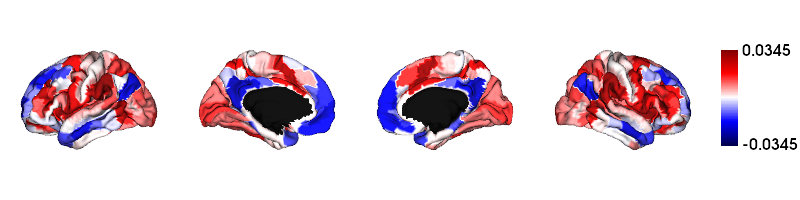

In [30]:
# Checking the cortical surface data
surf_lh, surf_rh = load_fsa5()
plot_hemispheres(surf_lh, surf_rh, array_name=[grad_data], size=(800, 200), cmap=['seismic'], color_range='sym', color_bar=True, embed_nb=True)

In [15]:
Gcortex_df = pd.DataFrame()
for gradi in (n+1 for n in range(2)):
    grad_L = images.load_gifti(Func_results_path+f'Func_HCPMMP_Gradient-{gradi}_weighted_L_fsa-10k.gii')
    grad_R = images.load_gifti(Func_results_path+f'Func_HCPMMP_Gradient-{gradi}_weighted_R_fsa-10k.gii')
    grad_L_data = grad_L.agg_data()
    grad_R_data = grad_R.agg_data()
    grad_data = np.concatenate((grad_L_data, grad_R_data))
    Gcortex_df[gradi] = pd.DataFrame(grad_data)

In [54]:
pd.DataFrame(Gcortex_df).to_csv(results_path + 'Func_HCPMMP_Gradient-weighted_cortical_data.csv', index=False)

In [7]:
func_Gcortex = pd.read_csv(results_path + 'Func_HCPMMP_Gradient-weighted_cortical_data.csv')

In [8]:
func_Gcortex.shape

(20484, 2)

#### Structural data

In [58]:
# loading specific gradiet data
gradi = 1
grad_L = images.load_gifti(Diff_results_path+f'Diff_7Tsubj7TDWI_Gradient-{gradi}_weighted_L_fsa-10k.gii')
grad_R = images.load_gifti(Diff_results_path+f'Diff_7Tsubj7TDWI_Gradient-{gradi}_weighted_R_fsa-10k.gii')
grad_L_data = grad_L.agg_data()
grad_R_data = grad_R.agg_data()
grad_data = np.concatenate((grad_L_data, grad_R_data))

/home/ROBARTS/schakraborty/venv/lib/python3.9/site-packages/brainspace/plotting/base.py:287: UserWarning: Interactive mode requires 'panel'. Setting 'interactive=False'
  warnings.warn("Interactive mode requires 'panel'. "


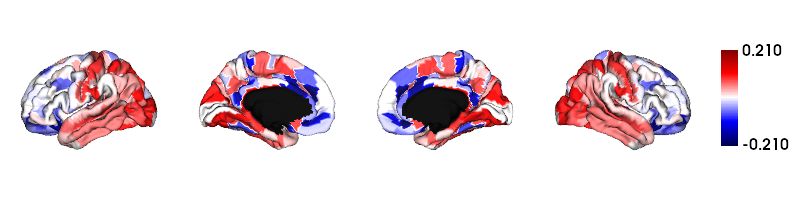

In [59]:
# Checking the cortical surface data
surf_lh, surf_rh = load_fsa5()
plot_hemispheres(surf_lh, surf_rh, array_name=[grad_data], size=(800, 200), cmap=['seismic'], color_range='sym', color_bar=True, embed_nb=True)

In [63]:
diff_Gcortex_df = pd.DataFrame()
for gradi in (n+1 for n in range(4)):
    grad_L = images.load_gifti(Diff_results_path+f'Diff_7Tsubj7TDWI_Gradient-{gradi}_weighted_L_fsa-10k.gii')
    grad_R = images.load_gifti(Diff_results_path+f'Diff_7Tsubj7TDWI_Gradient-{gradi}_weighted_R_fsa-10k.gii')
    grad_L_data = grad_L.agg_data()
    grad_R_data = grad_R.agg_data()
    grad_data = np.concatenate((grad_L_data, grad_R_data))
    diff_Gcortex_df[gradi] = pd.DataFrame(grad_data)

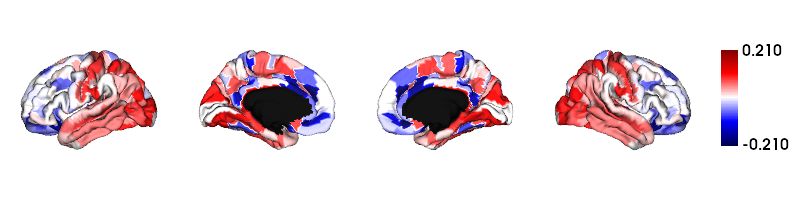

In [66]:
# Checking the cortical surface data
surf_lh, surf_rh = load_fsa5()
plot_hemispheres(surf_lh, surf_rh, array_name=[diff_Gcortex_df[1].to_numpy()], size=(800, 200), cmap=['seismic'], color_range='sym', color_bar=True, embed_nb=True)

In [67]:
pd.DataFrame(diff_Gcortex_df).to_csv(results_path + 'Diff_7Tsubj7TDWI_Gradient-weighted_cortical_data.csv', index=False)

In [9]:
diff_Gcortex = pd.read_csv(results_path + 'Diff_7Tsubj7TDWI_Gradient-weighted_cortical_data.csv')

In [10]:
diff_Gcortex.shape

(20484, 4)

### Loading gradient weighted cortical connectivity data

In [11]:
Func_GCtx = np.load(Func_results_path + 'Func_HCPMMP_Gradient-weighted_CorticalConnectivity.npz')
Func_GCtx.files

['G1_Ctx', 'G2_Ctx', 'G1fc', 'G2fc']

In [12]:
Diff_GCtx = np.load(Diff_results_path + 'Diff_7Tsubj7TDWI_Gradient-weighted_CorticalConnectivity.npz')
Diff_GCtx.files

['G1_Ctx', 'G2_Ctx', 'G3_Ctx', 'G4_Ctx', 'G1fc', 'G2fc', 'G3fc', 'G4fc']

In [13]:
Diff_GCtx['G1_Ctx'].shape

(7142, 360)

### Network

In [14]:
labels_txt = pd.read_csv(data_path+'hcp_mmp10_yeo7_modes.txt',header=None)

In [15]:
labels_txt[['Label','Hemisphere','Area','ROI','Network#','Network']]= labels_txt[0].str.split('_',expand=True)
networks = labels_txt['Network'].unique()
networks

array(['Visual', 'Somatomotor', 'Dorsal Attention', 'Ventral Attention',
       'Default', 'Frontoparietal', 'Limbic'], dtype=object)

In [16]:
num_network = labels_txt['Network#'].unique()
num_network

array(['1', '2', '3', '4', '7', '6', '5'], dtype=object)

In [102]:
yeo7L = nib.load(data_path + 'hcp.RSN.L.gii').darrays[0].data
yeo7R = nib.load(data_path + 'hcp.RSN.R.gii').darrays[0].data

In [114]:
yeo7 = np.concatenate((yeo7L, yeo7L))
yeo7.shape

(64984,)

In [54]:
# Set the Yeo7 color same as freesurfer https://surfer.nmr.mgh.harvard.edu/fswiki/CorticalParcellation_Yeo2011 
colorLUT = ((255,255,255),
         (120,  18, 134),
         (70 ,130, 180),
         ( 0 ,118 , 14),
         (196 , 58 ,250),
         (220 ,248 ,164),
         (230, 148,  34),
         (205 , 62,  78 ))

In [58]:
cols = np.asarray(colorLUT, dtype=float)/255
yeoCols = ListedColormap(cols, name='Yeo7colormap')

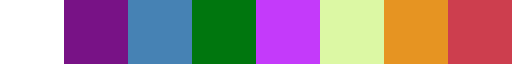

In [59]:
yeoCols

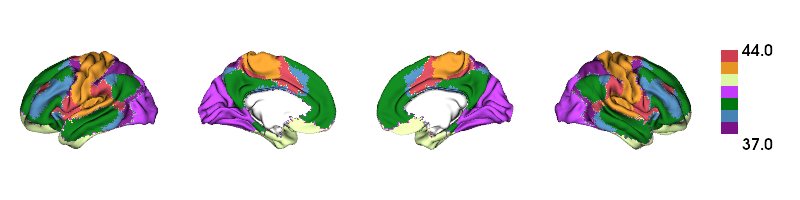

In [126]:
surf_lh, surf_rh = load_conte69()
plot_hemispheres(surf_lh, surf_rh, array_name=[yeo7], size=(800, 200), cmap=[yeoCols], color_bar=True, embed_nb=True)

In [96]:
convertYeo7 = [2,5,6,0,4,1,3] 
cols7 = ((255,255,255),
         (120,  18, 134),
         (70 ,130, 180),
         ( 0 ,118 , 14),
         (196 , 58 ,250),
         (220 ,248 ,164),
         (230, 148,  34),
         (205 , 62,  78 ))
cols = cols7
cols = np.asarray(cols, dtype=float)/255
yeoCols = ListedColormap(cols,name='colormapYeo')



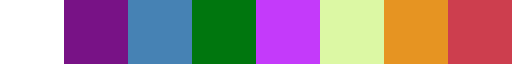

In [97]:
yeoCols

In [ ]:
colors1 = list()
for i in range(0,len(networks)):
    colors1.append(tuple(cols[convertYeo7[networks[i]] + 1]))

/tmp/ipykernel_130061/547185212.py:9: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  yeoV7_1 = nib.Nifti1Image((yeoV7.get_data() == convertYeo7[sz[x]] + 1).astype(int), yeoV7.get_affine())


TypeError: 'int' object is not subscriptable

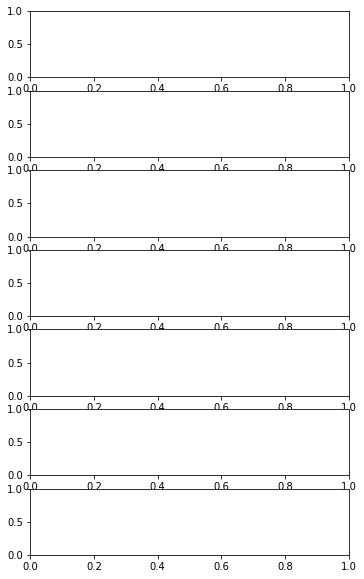

In [100]:
# Yeo 7 network brain visualize
height=10
sz = len(networks)
fig, axarr = plt.subplots(nrows=sz, ncols=1, figsize=(2*(20/sz),height))
data = datasets.fetch_atlas_yeo_2011(data_dir=data_path)
yeoV7 = nib.load(data.thick_7)
y = 0
for x in range(sz):
    yeoV7_1 = nib.Nifti1Image((yeoV7.get_data() == convertYeo7[sz[x]] + 1).astype(int), yeoV7.get_affine())     
    yeoCols = ListedColormap(cols[[0,convertYeo7[ord[x]] + 1]],name='colormapYeo')
    plotting.plot_glass_brain(yeoV7_1, axes=axarr[x], annotate=False, alpha=0.3, cmap=yeoCols, threshold=0.1) 
                          #output_file=fig_path+'yeo_brains.png')
    y += 1

In [90]:
len(networks)

7

### Calculating network association with cortical maps

#### Functional data

In [17]:
Func_GCtx.files

['G1_Ctx', 'G2_Ctx', 'G1fc', 'G2fc']

In [18]:
func_g1 = pd.DataFrame(Func_GCtx['G1_Ctx'])
func_g2 = pd.DataFrame(Func_GCtx['G2_Ctx'])

In [19]:
net_mean = []
funcG1_net = pd.DataFrame()
for nets in networks:
    net_df = labels_txt.loc[(labels_txt['Network'] == nets)]
    net_inds = list(net_df.index.values)
    net_con_df = func_g1.iloc[:,net_inds]
    net_mean = net_con_df.mean()
    funcG1_net[str(nets)] = pd.Series(net_mean.values)

In [20]:
net_mean = []
funcG2_net = pd.DataFrame()
for nets in networks:
    net_df = labels_txt.loc[(labels_txt['Network'] == nets)]
    net_inds = list(net_df.index.values)
    net_con_df = func_g2.iloc[:,net_inds]
    net_mean = net_con_df.mean()
    funcG2_net[str(nets)] = pd.Series(net_mean.values)

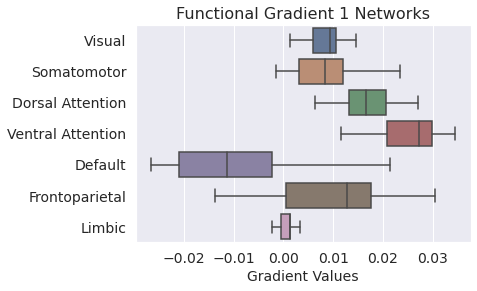

In [61]:
p = sns.boxplot(data=funcG1_net, saturation=0.5, orient='h', showfliers=False)
p.tick_params(labelsize=14)
p.axes.set_title("Functional Gradient 1 Networks", fontsize=16)
p.set_xlabel("Gradient Values", fontsize=14)
plt.show()

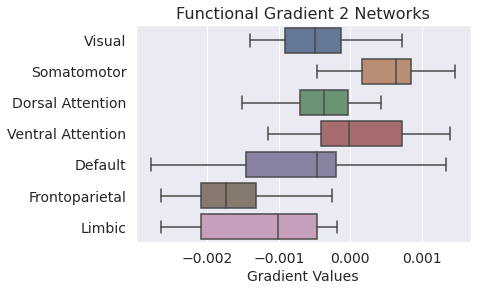

In [52]:
p = sns.boxplot(data=funcG2_net, saturation=0.5, orient='h', showfliers=False) 
p.tick_params(labelsize=14)
p.axes.set_title("Functional Gradient 2 Networks", fontsize=16)
p.set_xlabel("Gradient Values", fontsize=14)
plt.show()

#### Structural data

In [23]:
Diff_GCtx.files

['G1_Ctx', 'G2_Ctx', 'G3_Ctx', 'G4_Ctx', 'G1fc', 'G2fc', 'G3fc', 'G4fc']

In [24]:
diff_g1 = pd.DataFrame(Diff_GCtx['G1_Ctx'])
diff_g2 = pd.DataFrame(Diff_GCtx['G2_Ctx'])
diff_g3 = pd.DataFrame(Diff_GCtx['G3_Ctx'])
diff_g4 = pd.DataFrame(Diff_GCtx['G4_Ctx'])

In [25]:
net_mean = []
diffG1_net = pd.DataFrame()
for nets in networks:
    net_df = labels_txt.loc[(labels_txt['Network'] == nets)]
    net_inds = list(net_df.index.values)
    net_con_df = diff_g1.iloc[:,net_inds]
    net_mean = net_con_df.mean()
    diffG1_net[str(nets)] = pd.Series(net_mean.values)

In [27]:
net_mean = []
diffG2_net = pd.DataFrame()
for nets in networks:
    net_df = labels_txt.loc[(labels_txt['Network'] == nets)]
    net_inds = list(net_df.index.values)
    net_con_df = diff_g2.iloc[:,net_inds]
    net_mean = net_con_df.mean()
    diffG2_net[str(nets)] = pd.Series(net_mean.values)

In [28]:
net_mean = []
diffG3_net = pd.DataFrame()
for nets in networks:
    net_df = labels_txt.loc[(labels_txt['Network'] == nets)]
    net_inds = list(net_df.index.values)
    net_con_df = diff_g3.iloc[:,net_inds]
    net_mean = net_con_df.mean()
    diffG3_net[str(nets)] = pd.Series(net_mean.values)

In [29]:
net_mean = []
diffG4_net = pd.DataFrame()
for nets in networks:
    net_df = labels_txt.loc[(labels_txt['Network'] == nets)]
    net_inds = list(net_df.index.values)
    net_con_df = diff_g4.iloc[:,net_inds]
    net_mean = net_con_df.mean()
    diffG4_net[str(nets)] = pd.Series(net_mean.values)

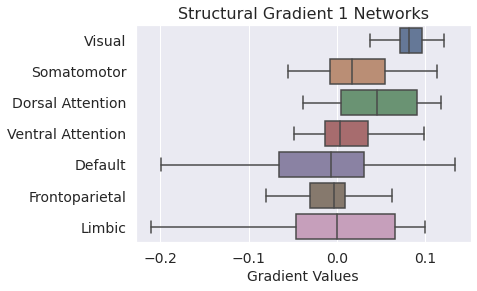

In [51]:
p = sns.boxplot(data=diffG1_net, saturation=0.5, orient='h', showfliers=False) 
p.tick_params(labelsize=14)
p.axes.set_title("Structural Gradient 1 Networks", fontsize=16)
p.set_xlabel("Gradient Values", fontsize=14)
plt.show()

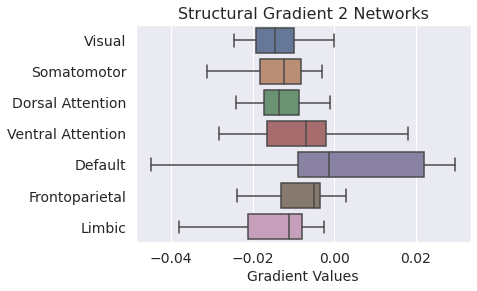

In [50]:
p = sns.boxplot(data=diffG2_net, saturation=0.5, orient='h', showfliers=False) 
p.tick_params(labelsize=14)
p.axes.set_title("Structural Gradient 2 Networks", fontsize=16)
p.set_xlabel("Gradient Values", fontsize=14)
plt.show()

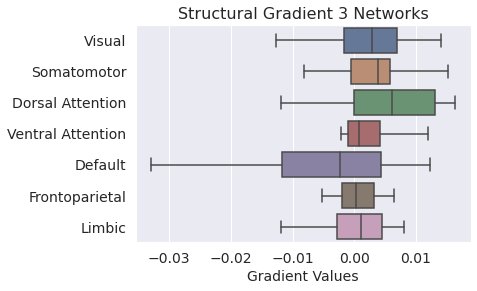

In [49]:
p = sns.boxplot(data=diffG3_net, saturation=0.5, orient='h', showfliers=False) 
p.tick_params(labelsize=14)
p.axes.set_title("Structural Gradient 3 Networks", fontsize=16)
p.set_xlabel("Gradient Values", fontsize=14)
plt.show()

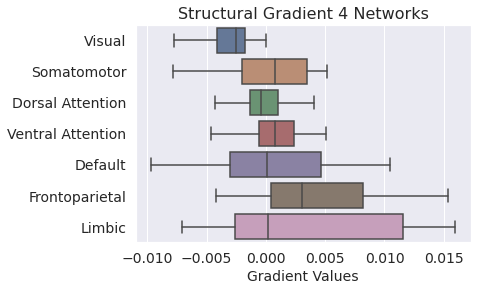

In [48]:
p = sns.boxplot(data=diffG4_net, saturation=0.5, orient='h', showfliers=False) 
p.tick_params(labelsize=14)
p.axes.set_title("Structural Gradient 4 Networks", fontsize=16)
p.set_xlabel("Gradient Values", fontsize=14)
plt.show()